# 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid', {'grid.color': '.1', 'text.color': '.1'})

In [2]:
df = pd.read_csv('games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что:
- во многих столбцах есть пропуски
- у некоторых столбцов надо заменить тип данных  


# 2. Подготовка данных  
Приведем названия столбцов к нижнему регистру

In [3]:
df.columns = [elem.lower() for elem in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразуем данные в нужные типы и заполним пропуски

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Столбец _name_:
- имеет пропуски:

In [5]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что такие же пропуски есть в стобце _genre_.  В данных строках очень мало данных, игры вышли давно, денежный вклад маленький.   Всего лишь 2 строки из 16715 строк всего  =>  смело удаляем данные строки и не учитываем в дальнейшем анализе

In [6]:
df.dropna(subset = ['name'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Столбец _year_of_release_:
- должен иметь целоцисленные значения => нужно заменить тип с float на int
- имеет пропуски

Пропусков не так много - 269 из 16713.  Можно удалить, но посмотрим что можно сделать...

1. Посмотрим на имена игр, у которых пропущен _year_of_release_...

In [8]:
df[df['year_of_release'].isna()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

... видим, что в названии некоторых игр зашит сам год выхода игры, например "Madden NFL 2004" - значит скорее всего вышла в 2004году.  
Напишем функцию, которая определит год выпуска по названию игры и с помощью нее заполним часть пропусков  
На самом деле год, указанный в названии игры может быть не равен году выхода (например как в строке 16711), но вряд ли они будут отличаться больше чем на один год, поэтому наше приближение имеет право на жизнь

Создаем функцию:

In [9]:
# Сначала получим список всех годов, которые есть в датасете:
years = df['year_of_release'].unique()
years = sorted(years[~np.isnan(years)])

#Создадим словарь, где:
    # ключ - год выпуска, защитый в названии игры
    # значение - год выпуска, записанный в численном виде
dict_years =  {str(int(year)):int(year) for year in years}

 К словарю, конечно можно добавить элементы типа  01:2001...07:2007; 97:1997...99:1999, 
но есть риск ошибок например с названием 'Drake of the 99 Dragons'
Также есть значения типа 2K8 , что переводится как 2008, но таких значений совсем мало, 
поэтому такие варианты тоже проигнорируем

In [10]:
# создаем саму функцию
def year_by_name(row):
    calculated_year = row['year_of_release']
    if np.isnan(row['year_of_release']):
        for key in dict_years:
            if key in row['name']:
                calculated_year = dict_years[key]
    return calculated_year

Применяем функцию:

In [11]:
df['year_of_release'] = df.apply(year_by_name, axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


было <<year_of_release  16444 non-null>> и стало << year_of_release  16461 non-null >>|=> немного но приятно :))  
Посмотрим что еще можем сделать...  
Посмотрим как распределены даты выхода игр для каждой игровой платформы:

In [100]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

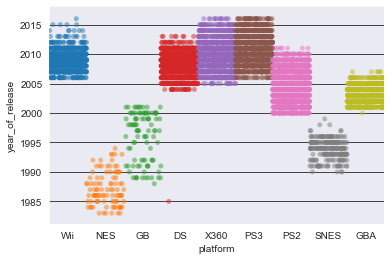

In [14]:
sns.stripplot(data=df[df['platform'].isin(['Wii', 'NES', 'GB', 'DS', 
                             'X360', 'PS3', 'PS2', 'SNES', 'GBA'])],
              x='platform', y='year_of_release', jitter=0.5, alpha = 0.5)

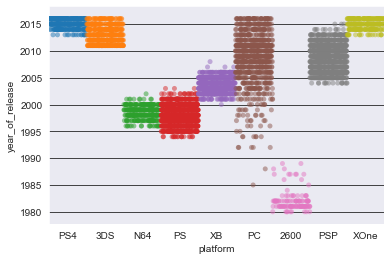

In [15]:
sns.stripplot(data=df[df['platform'].isin(['PS4', '3DS', 'N64', 'PS', 'XB', 'PC',
                                           '2600', 'PSP', 'XOne'])],
              x='platform', y='year_of_release', jitter=0.5, alpha = 0.5)

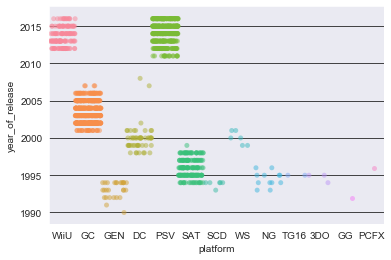

In [16]:
sns.stripplot(data=df[df['platform'].isin(['WiiU', 'GC', 'GEN', 'DC', 'PSV', 
                        'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'])],
              x='platform', y='year_of_release', jitter=0.5, alpha = 0.5)

In [17]:
# список приставок, для которых есть пропуски в дате выхода
df[df['year_of_release'].isna()]['platform'].unique()

array(['Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP', 'XB',
       'PS2', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

На графиках видим, что игры для всех приставок выходили равномерно с течением времени в определенном интервале. Есть приставки, с маленьким числом игр, но они не попадают в список, для которого мы хотим определить дату выхода.   
Таким образом оставшиеся пропуски можем заполнить медианными значениями, сгруппировав данные по типу приставки.  
Напишем функцию, которая будет заполнять пропуски по указанной выше методике

In [18]:
def year_by_platform(row):
    calculated_year = row['year_of_release']
    if np.isnan(row['year_of_release']):
        calculated_year = round(df[df['platform'] == row['platform']]['year_of_release'].mean())
    return calculated_year

Применяем функцию к датасету:

In [19]:
df['year_of_release'] = df.apply(year_by_platform, axis = 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Результат: все оставшиеся пропуски в _year_of_release_  ЗАПОЛНЕНЫ.  
Теперь поменяем тип данных с float на int

In [21]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


### Столбцы _user_score_  и _critic_score_ : 
- столбец _user_score_ должен иметь значения float вместо object  
- имеются пропуски, причем в разном количестве для каждого столбца  

Посмотрим на уникальные значения _user_score_:

In [23]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди НЕпропусков есть значения "tbd", что озачает "to be determined" ("подлежит определению"). Такие значения сейчас равнозначны пропускам, поэтому заменим их пропусками.  

Преобразуем тип данных столбца _user_score_ во float и одновременно все нечисловые значения заменим пропусками

In [24]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [25]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Для имеющихся пропусков в _user_score_  и _critic_score_ попробуем определить зависимость между разными параметрами.
Посмотрим на корреляцию:

In [27]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.093275,0.004514,-0.165816,0.038110,0.010635,-0.265966
na_sales,-0.093275,1.000000,0.765341,0.449668,0.638695,0.240755,0.086200
eu_sales,0.004514,0.765341,1.000000,0.435079,0.722796,0.220752,0.055337
jp_sales,-0.165816,0.449668,0.435079,1.000000,0.291090,0.152593,0.125598
other_sales,0.038110,0.638695,0.722796,0.291090,1.000000,0.198554,0.057119
critic_score,0.010635,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.265966,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


Также визуализируем корреляцию:

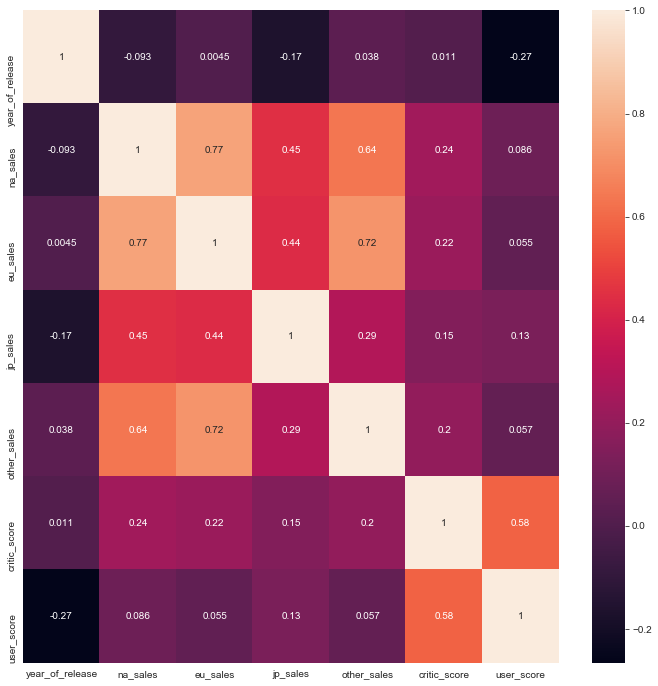

In [28]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

Прослеживается высокая корреляция между _critic_score_ и _user_score_.  
Посмотрим также на диаграмме рассеяния:

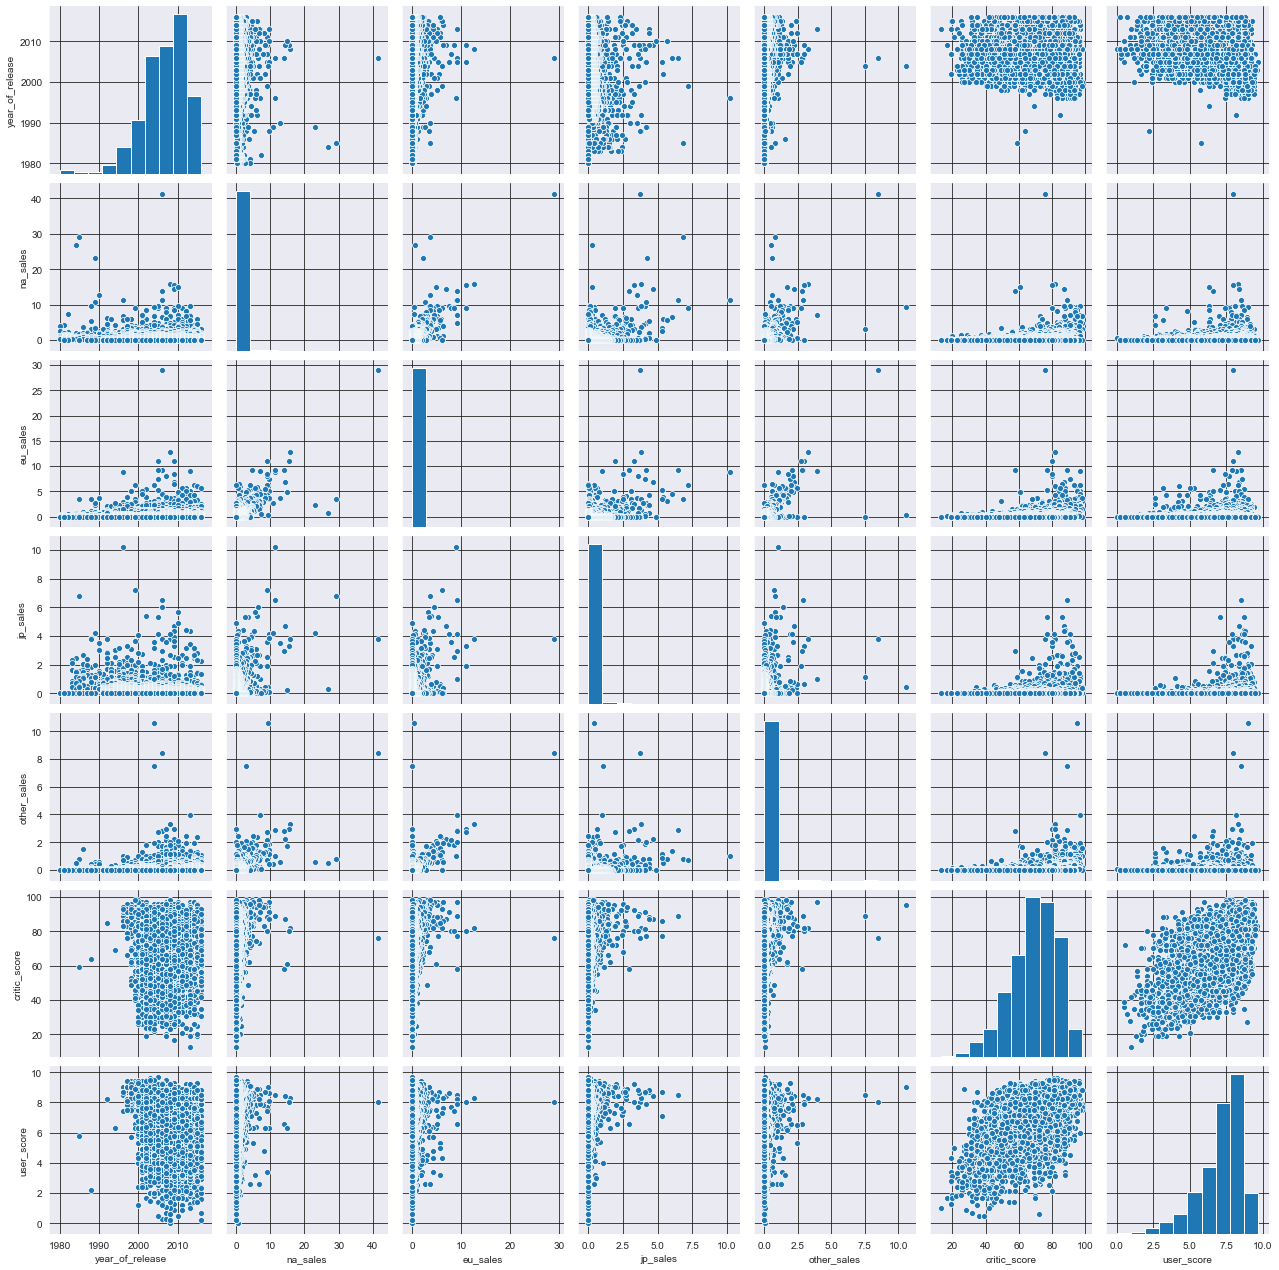

In [29]:
sns.pairplot(df)

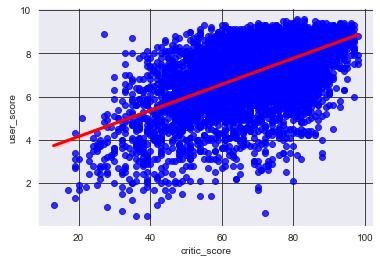

In [30]:
sns.regplot(data=df, x = 'critic_score', y='user_score', scatter_kws={'marker':'D', 'color':'blue'}, 
            line_kws={'color':'red', 'linewidth':3})

Да, на графике также видна зависимость между  _critic_score_ и _user_score_, похожая на линейную (зависимость логична, т.к. оценка критиков и пользователей в целом должны быть похожи).  

Таким образом можно аппроксимировать, что  _critic_score_ и _user_score_  имеют линейную зависимость и вычислить часть значений для игр, у которых известно хотя бы одно из 2 значений   _critic_score_ / _user_score_.  

Будем искать зависимость в следующем виде:  
y= f(x) = p1*x + p0, где:  
x - critic_score;  
y -  user_score;  
p1,p0 - коэффициенты, которые надо найти

#####  ! ! !  ВАЖНО ! ! !, по графику видно, что:
- при низких user_score мы можем уйти в отрицательные значения по critic_score, чего не может быть. Для большей безопасности, поставим ограничение, чтобы новые "точки" на графике не выходили далеко за границу основного облака. Т.е. примерно  critic_score > 17. 

- при очень высоких user_score мы можем уйти в значения critic_score >100%, чего тоже не может быть. По аналогии с предыдущим пунктом поставим безопасное ограничение critic_score > 97%



Вычислим коэффициенты p1,p0  (используем готовый метод np.polyfit):

In [31]:
# получим выборку critic_score = x
x = df.loc[(~df['user_score'].isna() & ~df['critic_score'].isna()), 'critic_score']
x

0        76.0
2        82.0
3        80.0
6        89.0
7        58.0
         ... 
16673    81.0
16692    80.0
16696    61.0
16702    60.0
16705    63.0
Name: critic_score, Length: 7017, dtype: float64

In [32]:
# получим выборку user_score = y
y = df.loc[(~df['user_score'].isna() & ~df['critic_score'].isna()) , 'user_score']
y

0        8.0
2        8.3
3        8.0
6        8.5
7        6.6
        ... 
16673    8.8
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 7017, dtype: float64

In [33]:
# вычисляем коэффициенты
p = np.polyfit(x, y, 1)  
p

array([0.06031311, 2.94544312])

создаем функцию f(x) = p1*x + p0 с найденными коэффициентами для определения user_score:

In [34]:
f = np.poly1d(p)

 также создаем обратную функцию g(y) для обратного определения critic_score по значениям user_score:

In [35]:
def g(y):
    return (y - p[1])/p[0]

И наконец создадим функцию, которую применим к нашему датафрейму для заполнения вычисленных пропусков:

In [36]:
def user_critic_score_fill(row):
    result = row[['critic_score','user_score']]
    if np.isnan(row['user_score']) and ~np.isnan(row['critic_score']):
        row['user_score'] = f(row['critic_score'])
    if ~np.isnan(row['user_score']) and np.isnan(row['critic_score']) and (
        17 < g(row['user_score']) < 97):
        row['critic_score'] = g(row['user_score'])
    result = row[['critic_score','user_score']]
    return result
        

Применяем функцию к датасету:

In [37]:
df[['critic_score','user_score']] = df.apply(user_critic_score_fill, axis = 1)

Посмотрим на результат:

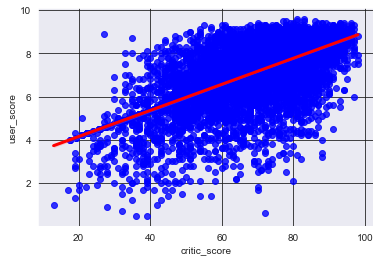

In [38]:
sns.regplot(data=df, x = 'critic_score', y='user_score', scatter_kws={'marker':'D', 'color':'blue'}, 
            line_kws={'color':'red', 'linewidth':3})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8600 non-null   float64
 9   user_score       8710 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 2.1+ MB


__Результат:__  
   Было - critic_score __8137__ non-null; user_score __7590__ non-null  
   Стало - critic_score __8600__ non-null; user_score  __8710__ non-null  
   По оставшимся пропускам (в том числе столбца _rating_) нет данных как их правильно заполнять => оставляем их и продолжаем исследование  
  

# 3. Исследовательский анализ данных  
## 3.1 Посчитаем суммарные продажи во всех регионах

In [42]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [43]:
sales_per_region = df[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum()
sales_per_region

na_sales       4400.57
eu_sales       2424.14
jp_sales       1297.34
other_sales     791.24
dtype: float64

## 3.2 Посмотрим, сколько игр выпускалось в разные годы.
Создадим сводную таблицу с количеством вышедших игр по годам:

In [44]:
df2 = df.groupby('year_of_release').count()['name'].reset_index()
df2.rename(columns={'name':'games_released'}, inplace = True)
df2

,year_of_release,games_released
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Для наглядности построим график количества вышедших игр по годам:

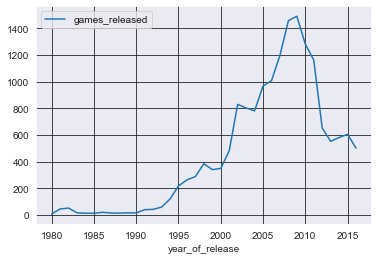

In [45]:
df2.plot(x='year_of_release', y='games_released', grid=True, kind='line')

На графике видим, что до 1994 года выходило очень мало игр и значительно больше игр выходило начиная с 1994г.  Покажем количественно:

In [46]:
print('Среднее количество вышедших игр/год за период до 1994г = ',
     df2[df2['year_of_release']<1994]['games_released'].mean())
print('Среднее количество вышедших игр/год за период начиная с 1994г = ',
     df2[df2['year_of_release']>=1994]['games_released'].mean())

Среднее количество вышедших игр/год за период до 1994г =  27.285714285714285
Среднее количество вышедших игр/год за период начиная с 1994г =  710.0434782608696


Следовательно имеет смысл рассматривать период с 1994 по 2016г  
## 3.3 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы  
Добавим в исходную таблицу столбец с общей прибылью по всем регионам:

In [47]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Создадим сводную таблицу с суммарными продажами для каждой приставки:

In [48]:
df3 = df.groupby('platform')['total_sales'].sum().reset_index()
# выполняем сортировку
df3.sort_values('total_sales', ascending = False, ignore_index=True, inplace = True)
df3

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


По полученной таблице можно выделить 6 платформ с максимальной прибылью:

In [49]:
money_platforms = np.array(df3.loc[:5, 'platform'])
money_platforms

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

Строим распределение по годам для данных платформ:

In [50]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [51]:
df4 = df[df['platform'].isin(money_platforms)].pivot_table(
    index = 'year_of_release', columns = 'platform', 
    values = 'total_sales', aggfunc = 'sum')
df4

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,172.77,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


СТОП.  Обнаружили ошибку.  В колонке DS обнаружили игру 1985 года выпуска.  В то время такой приставки еще не было. Проверяем строки с такими значениями:

In [52]:
df.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Интернет показал,  
https://global.rakuten.com/en/store/mediaworldkaitoriworld/item/10200520001/
что эта игра вышла в 2007году. Исправляем ошибку:

In [53]:
df.loc[15957,'year_of_release'] = 2007
df.loc[15957,'year_of_release']

2007

! ! ! Ошибка исправлена. Повторяем построение сводной таблицы и двигаемся дальше:

In [54]:
df4 = df[df['platform'].isin(money_platforms)].pivot_table(
    index = 'year_of_release', columns = 'platform', 
    values = 'total_sales', aggfunc = 'sum')
df4

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,172.77,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


Для наглядности строим графики:

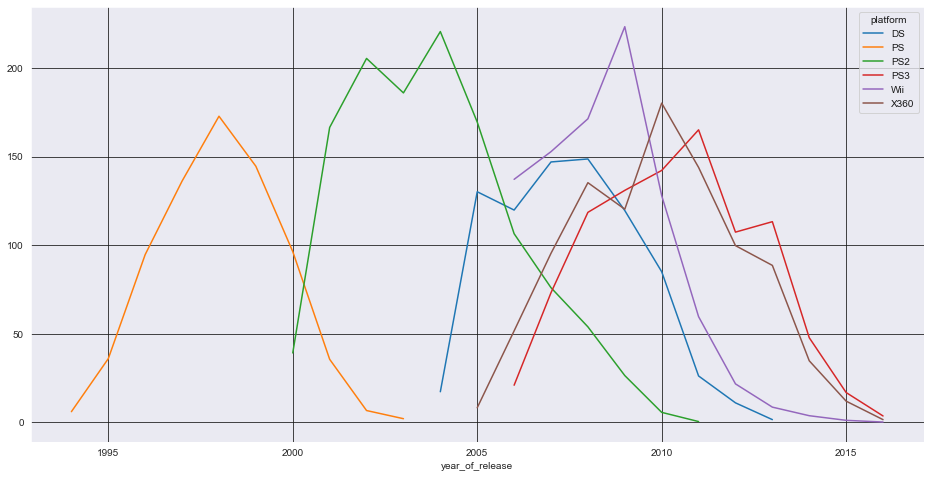

In [55]:
df4.plot(grid=True, figsize = (16,8))

По графикам и значениям в таблице видно, что для всех игр существует общий характерный период с момента выхода платформы до момента прекращения выхода игр для нее. Посчитаем данный период:

In [56]:
df4.notna().sum()

platform
DS      10
PS      10
PS2     12
PS3     11
Wii     11
X360    12
dtype: int64

Таким образом актуальный период составляет лет:

In [57]:
actual_period = df4.notna().sum().median()
actual_period

11.0

### Далее возьмем в качестве исследуемого период с 2006 по 2016:

In [58]:
df5 = df.query('2006 <= year_of_release <= 2016')

In [59]:
df5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


## 3.4 Посмотрим какие платформы лидируют по продажам / растут / падают. Выберем несколько потенциально прибыльных платформ.

Покажем лидеров по продажам:

In [60]:
df5.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    963.17
PS3     939.65
Wii     907.51
DS      658.71
PS4     314.14
PS2     268.84
3DS     259.00
PSP     243.15
PC      167.18
XOne    159.32
WiiU     82.19
PSV      54.07
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64

Чтобы ответить на вопрос "какие платформы растут или падают?" создадим сводную таблицу с суммарными продажами для каждой платформы за соответствующий год и построить график

In [61]:
df6 = df5.pivot_table(index = 'platform', 
                      columns = 'year_of_release', values = 'total_sales', aggfunc= 'sum')
df6

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,63.20,51.36,57.76,43.76,27.78,15.14
DC,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,119.81,146.96,148.65,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,2.85,9.28,12.42,20.32,24.28,35.03,23.22,12.73,13.28,8.52,5.25
PS2,106.46,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,20.96,73.19,118.52,130.93,142.17,165.09,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25


Строим график

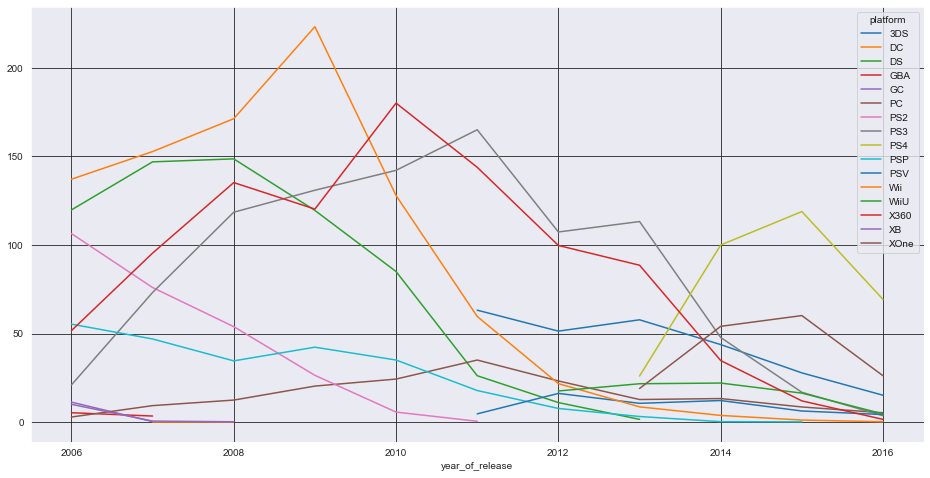

In [62]:
df6.T.plot(grid = True, figsize = (16,8))

На момент 2016 года все платформы падают в продажах. Тяжело выбрать потенциально прибыльные платформы. Но для многих платформ наблюдается один локальный минимум продаж в середине своего периода.  
Из этих соображений выбираем в качестве потенциально прибыльных платформ: PS4, XOne, WiiU - они на спаде, но у них еще не было локального минимума и они вышли позже всех (еще не израсходовали свой потенциал)

Помотрим на них на отдельном графике:

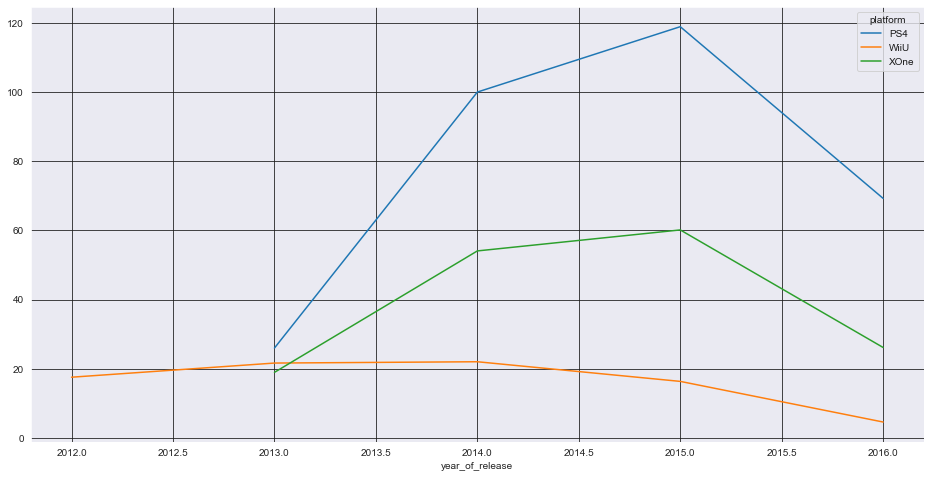

In [63]:
df6.query('platform in ["PS4", "XOne", "WiiU"]').T.plot(grid = True, figsize = (16,8))

## 3.5 Построем график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценим разницу в продажах / средних продажах на разных платформах

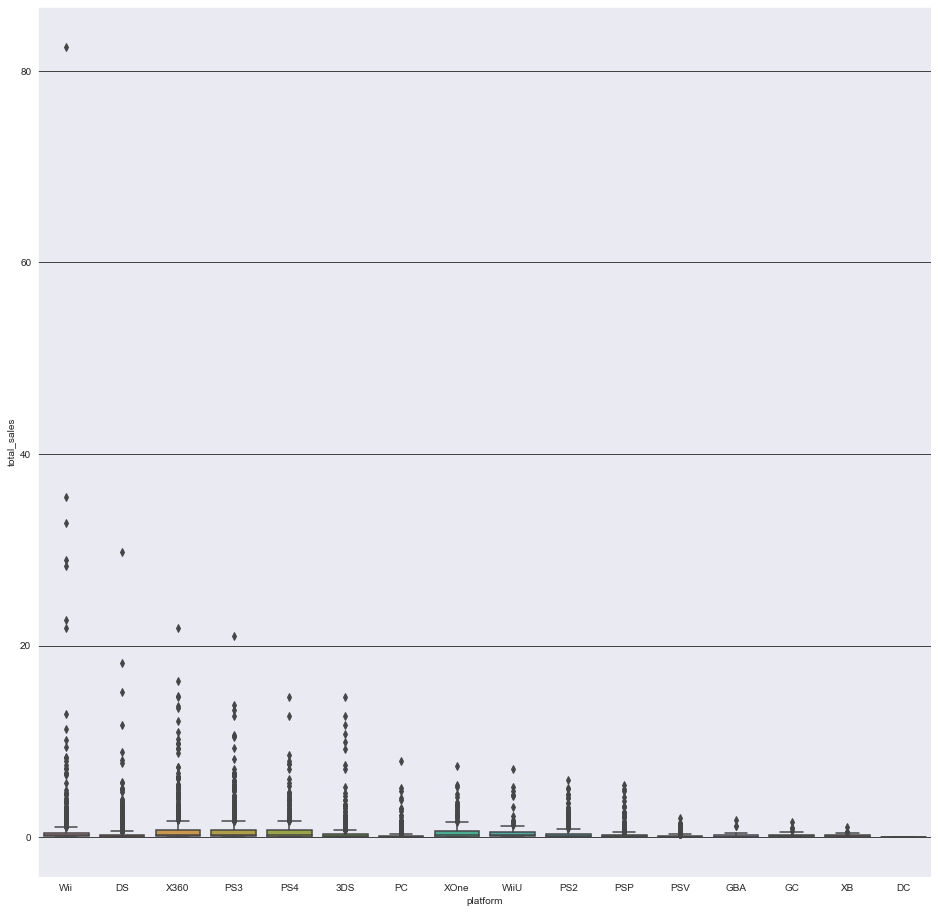

In [64]:
# Строим ящики с усами
plt.figure(figsize=(16, 16))
ax1 = sns.boxplot(data = df5,  x = 'platform', y = 'total_sales')

Ограничим диапазон y:

(0, 5)

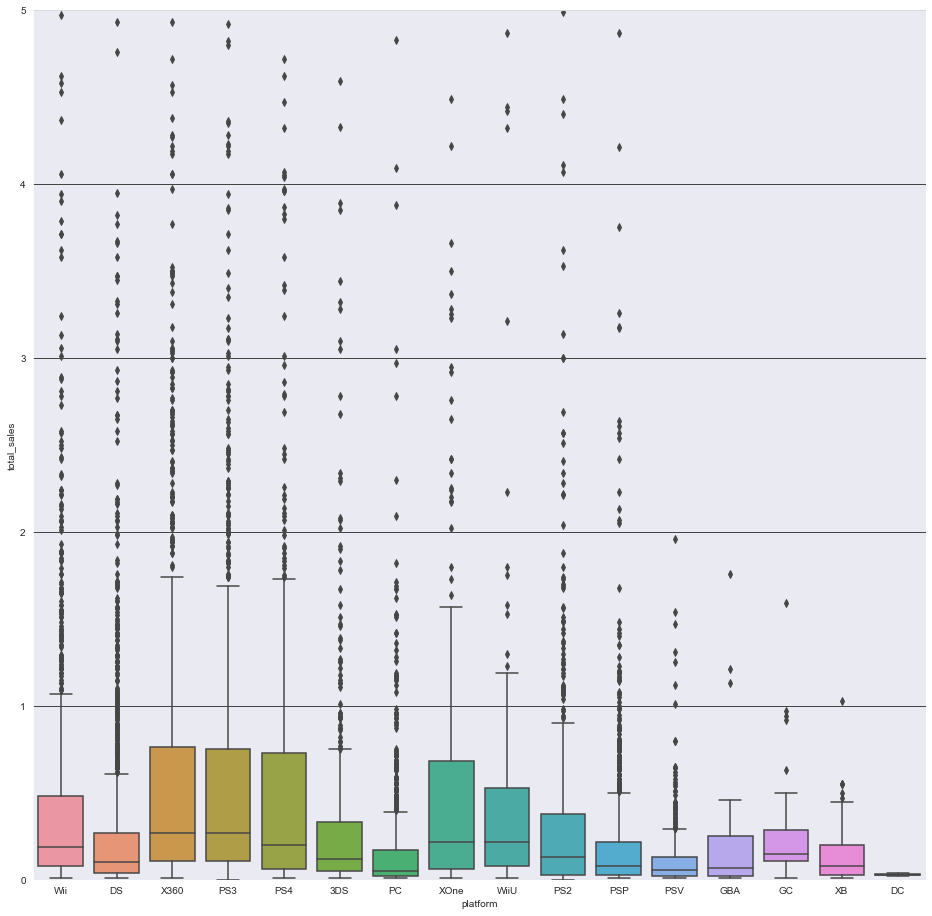

In [65]:
plt.figure(figsize=(16, 16))
ax2 = sns.boxplot(data = df5,  x = 'platform', y = 'total_sales')
ax2.set_ylim([0,5])

Дополнительно визуализируем какое количество игр приходится на каждую платформу:

(0, 2)

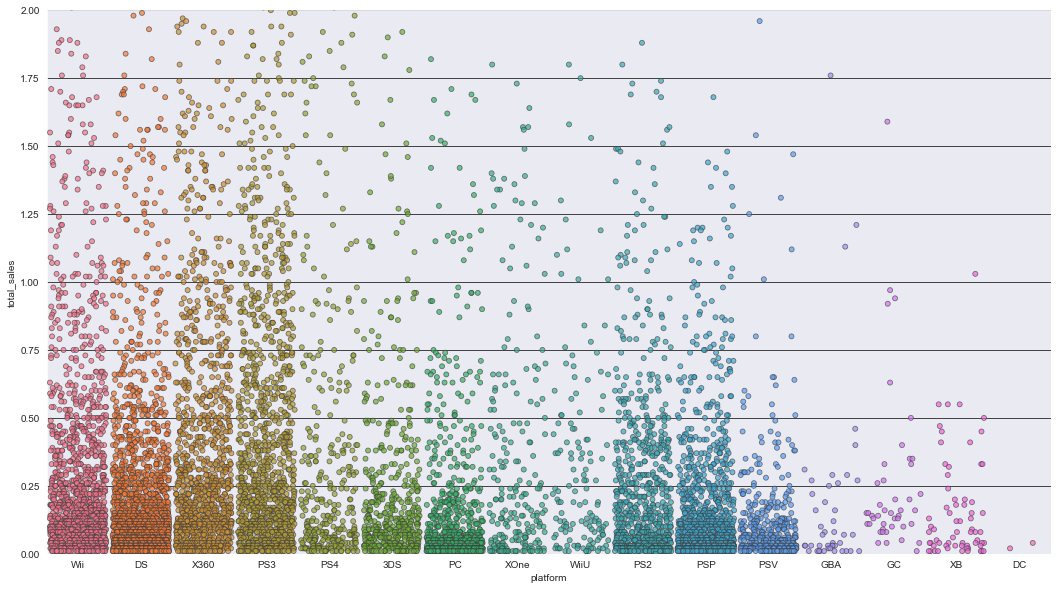

In [66]:
plt.figure(figsize=(18, 10))
ax3 = sns.stripplot(data=df5, x='platform', y='total_sales', 
                     jitter=0.45, alpha=0.7, palette='husl',linewidth=0.8)
ax3.set_ylim([0,2])

Также покажем численные значения продаж для каждой платформы: 

In [67]:
df5.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
X360    963.17
PS3     939.65
Wii     907.51
DS      658.71
PS4     314.14
PS2     268.84
3DS     259.00
PSP     243.15
PC      167.18
XOne    159.32
WiiU     82.19
PSV      54.07
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64

Вывод:  
видно что между платформами есть существенная разница в продажах.  При этом у платформ относительно  маленькая разница по средним (медианным) продажам, что видно на графиках "ящик с усами".


## 3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Выберем для рассмотрения PS4

In [68]:
df7_1 = df5.query('platform == "PS4"')
df7_1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Строим диаграмму рассеяния

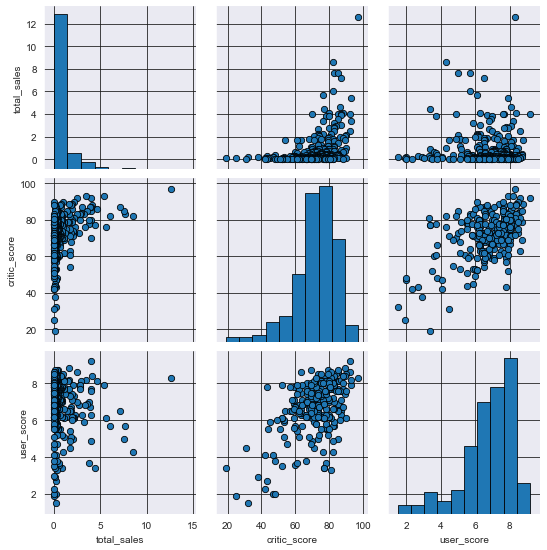

In [69]:
ax4 = sns.pairplot(df7_1[['total_sales','critic_score','user_score']],  
             plot_kws=dict(s=40, edgecolor="black", linewidth=0.8), 
             diag_kws=dict(edgecolor="black", linewidth=0.8))

Вычисляем корреляцию

In [70]:
df7_1[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.400771,-0.033375
critic_score,0.400771,1.000000,0.559721
user_score,-0.033375,0.559721,1.000000


Вывод:   
Между продажами и critic_score прослеживается линейная зависимость (высокая корреляция и видно на диаграмме рассеяния).  
Между продажами и user_score НЕ прослеживается линейная зависимость (низкая корреляция). Хотя визуально на графике кажется что слабая зависимость есть  
## 3.7 Соотнесем выводы с продажами игр на других платформах.  
Повторяем вычисления предыдущего пункта для других потенциально прибыльных платформ:  
Платформа "XOne":

In [71]:
df7_2 = df5.query('platform == "XOne"')
df7_2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


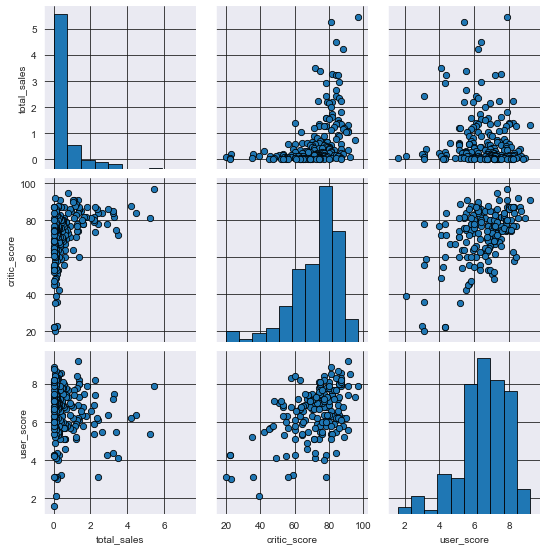

In [72]:
ax4 = sns.pairplot(df7_2[['total_sales','critic_score','user_score']],  
             plot_kws=dict(s=40, edgecolor="black", linewidth=0.8), 
             diag_kws=dict(edgecolor="black", linewidth=0.8))

In [73]:
df7_2[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406315,-0.069594
critic_score,0.406315,1.000000,0.501025
user_score,-0.069594,0.501025,1.000000


Платформа "WiiU":

In [74]:
df7_3 = df5.query('platform == "WiiU"')
df7_3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
185,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84.0,8.1,E,5.23
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,NaN,4.87
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
248,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.0,7.9,E10+,4.42


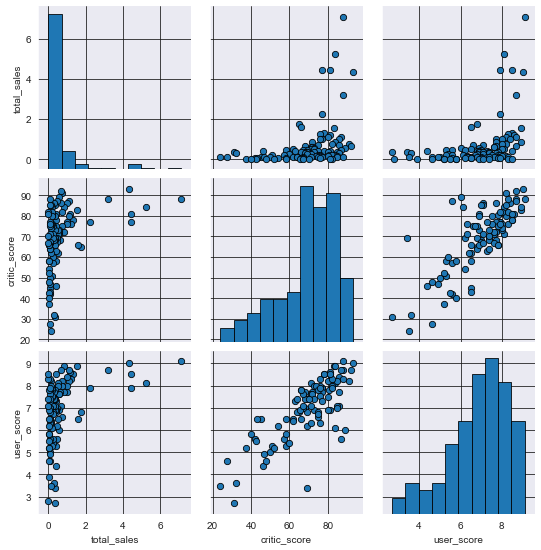

In [75]:
ax4 = sns.pairplot(df7_3[['total_sales','critic_score','user_score']],  
             plot_kws=dict(s=40, edgecolor="black", linewidth=0.8), 
             diag_kws=dict(edgecolor="black", linewidth=0.8))

In [76]:
df7_3[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.358378,0.397696
critic_score,0.358378,1.000000,0.785578
user_score,0.397696,0.785578,1.000000


Выводы: 
1. У всех трех потенциально прибыльных платформ просматривается зависимость продаж от _critic_score_.    
2. У платформы  WiiU дополнительно просматривается зависимость от _user_score_ (высокая корреляция).  
## 3.8 Посмотрим на общее распределение игр по жанрам  
Суммарные продажи для каждого жанра:

In [77]:
df5.groupby('genre')['total_sales'].sum().sort_values(ascending = False)

genre
Action          1135.64
Sports           800.11
Shooter          722.92
Misc             563.42
Role-Playing     523.49
Racing           301.11
Platform         280.30
Simulation       222.27
Fighting         191.68
Adventure        141.71
Puzzle            90.63
Strategy          74.69
Name: total_sales, dtype: float64

Также для наглядности построим <<ящики с усами>> и <<stripplotы>>

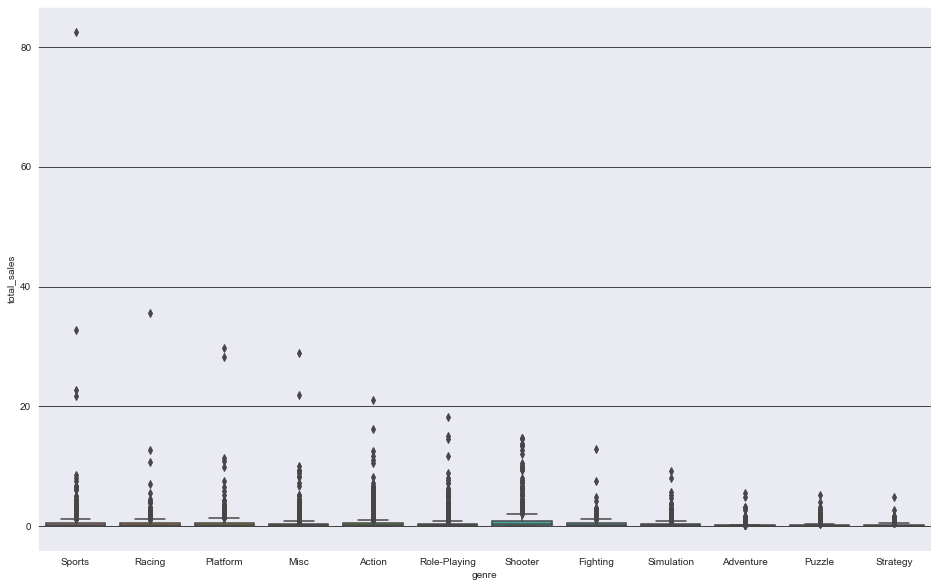

In [78]:
plt.figure(figsize=(16, 10))
ax5 = sns.boxplot(data = df5,  x = 'genre', y = 'total_sales')
#ax5.set_ylim([0,3])

Уменьшим ylim:

(0, 2)

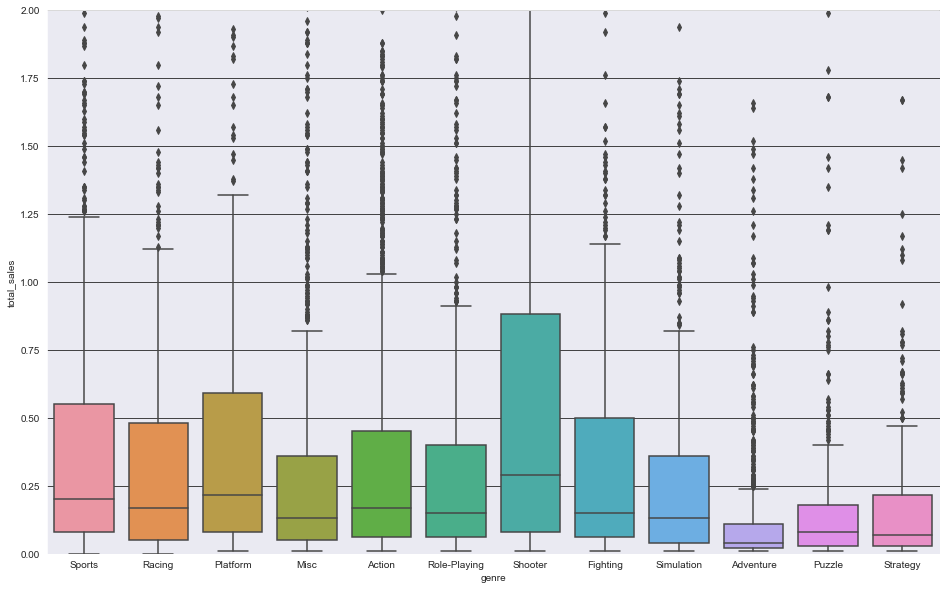

In [79]:
plt.figure(figsize=(16, 10))
ax5 = sns.boxplot(data = df5,  x = 'genre', y = 'total_sales')
ax5.set_ylim([0,2])

(0, 2)

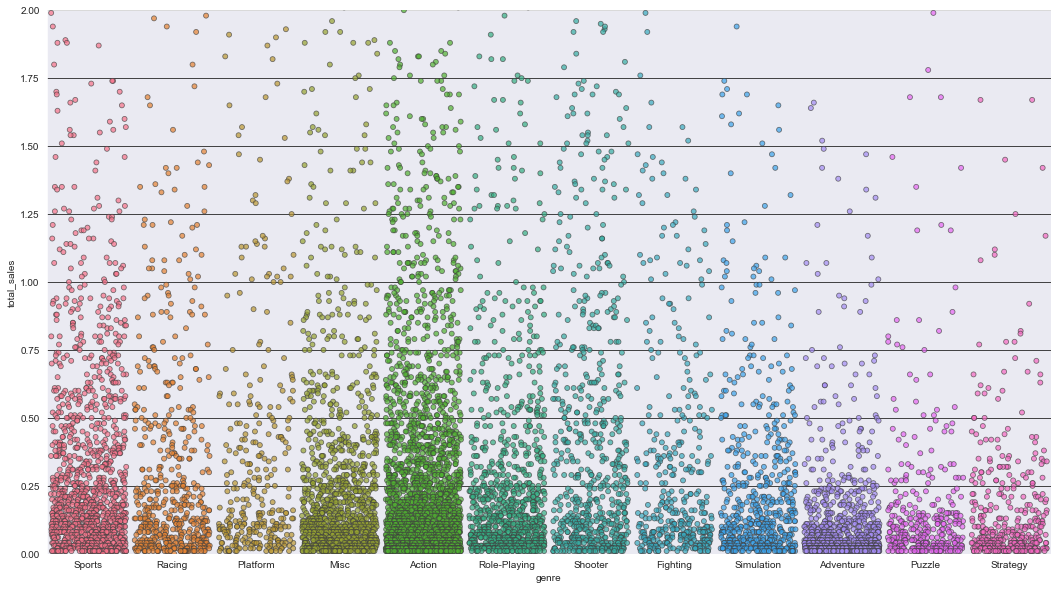

In [80]:
plt.figure(figsize=(18, 10))
ax10 = sns.stripplot(data=df5, x='genre', y='total_sales', 
                     jitter=0.45, alpha=0.7, palette='husl',linewidth=0.8)
ax10.set_ylim([0,2])

Вывод: по полученным данным можно выделить  жанры:  
с высокими продажами - Action, Sports, Shooter;  
с низкими продажами -   Adventure, Puzzle, Strategy.  
# 4. Составим портрет пользователя каждого региона  
## Определим для пользователя каждого региона (NA, EU, JP):
## 4.1 Самые популярные платформы (топ-5)

In [81]:
df5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Создадим сводную таблицу объема продаж для каждой платформы с расбивкой по регионам:

In [82]:
df8 = df5.groupby('platform').sum()[['na_sales','eu_sales','jp_sales']]
df8

,na_sales,eu_sales,jp_sales
platform,,,
3DS,83.49,61.48,100.67
DC,0.00,0.00,0.06
DS,326.08,143.47,142.06
GBA,5.15,1.88,1.51
GC,8.72,2.34,0.21
PC,45.64,102.39,0.00
PS2,116.46,47.30,35.97
PS3,393.49,330.29,80.19
PS4,108.74,141.09,15.96


Добавляем в таблицу столбцы с долями продаж

In [83]:
df8['na_sales_%'] = df8['na_sales'] / df8['na_sales'].sum()
df8['eu_sales_%'] = df8['eu_sales'] / df8['eu_sales'].sum()
df8['jp_sales_%'] = df8['jp_sales'] / df8['jp_sales'].sum()
df8

,na_sales,eu_sales,jp_sales,na_sales_%,eu_sales_%,jp_sales_%
platform,,,,,,
3DS,83.49,61.48,100.67,0.034579,0.040707,0.178209
DC,0.00,0.00,0.06,0.000000,0.000000,0.000106
DS,326.08,143.47,142.06,0.135051,0.094994,0.251478
GBA,5.15,1.88,1.51,0.002133,0.001245,0.002673
GC,8.72,2.34,0.21,0.003612,0.001549,0.000372
PC,45.64,102.39,0.00,0.018903,0.067794,0.000000
PS2,116.46,47.30,35.97,0.048234,0.031318,0.063675
PS3,393.49,330.29,80.19,0.162970,0.218692,0.141954
PS4,108.74,141.09,15.96,0.045036,0.093419,0.028253


Теперь можем посмотреть на топ 5 популярных платформ для каждого региона:

In [84]:
print(df8['na_sales_%'].sort_values(ascending = False)[:5])
print()
print(df8['eu_sales_%'].sort_values(ascending = False)[:5])
print()
print(df8['jp_sales_%'].sort_values(ascending = False)[:5])

platform
X360    0.246665
Wii     0.205799
PS3     0.162970
DS      0.135051
PS2     0.048234
Name: na_sales_%, dtype: float64

platform
PS3     0.218692
X360    0.178991
Wii     0.173615
DS      0.094994
PS4     0.093419
Name: eu_sales_%, dtype: float64

platform
DS     0.251478
3DS    0.178209
PS3    0.141954
PSP    0.126624
Wii    0.122730
Name: jp_sales_%, dtype: float64


Это же можно показать на круговой диаграмме:

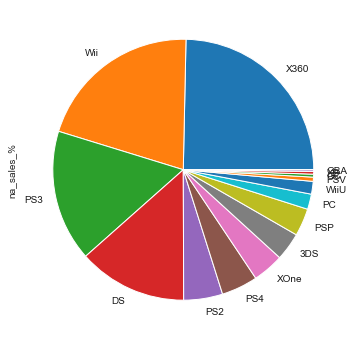

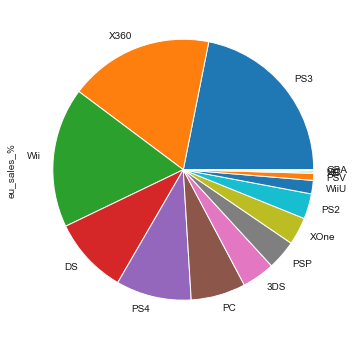

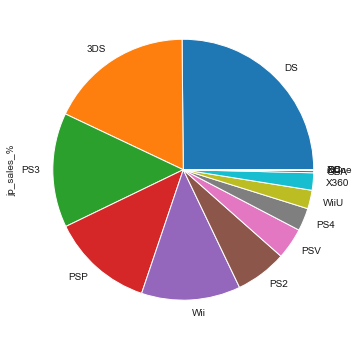

In [85]:
plt.figure(figsize=(6,6))
df8['na_sales_%'].sort_values(ascending = False).plot(kind='pie')
plt.figure(figsize=(6,6))
df8['eu_sales_%'].sort_values(ascending = False).plot(kind='pie')
plt.figure(figsize=(6,6))
df8['jp_sales_%'].sort_values(ascending = False).plot(kind='pie')

## 4.2 Самые популярные жанры (топ-5)

In [86]:
df5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Создадим сводную таблицу объема продаж для каждого жанра с разбивкой по регионам:

In [87]:
df9 = df5.groupby('genre').sum()[['na_sales','eu_sales','jp_sales']]
df9

,na_sales,eu_sales,jp_sales
genre,,,
Action,540.08,356.98,103.02
Adventure,61.81,37.92,29.55
Fighting,96.06,43.70,28.61
Misc,290.41,148.28,65.62
Platform,134.33,82.10,35.20
Puzzle,43.05,27.86,12.43
Racing,133.56,114.48,13.28
Role-Playing,200.01,110.79,170.84
Shooter,376.08,241.09,19.43


Теперь можем посмотреть на топ 5 популярных жанров для каждого региона:

In [88]:
print(df9['na_sales'].sort_values(ascending = False)[:5])
print()
print(df9['eu_sales'].sort_values(ascending = False)[:5])
print()
print(df9['jp_sales'].sort_values(ascending = False)[:5])

genre
Action          540.08
Sports          400.76
Shooter         376.08
Misc            290.41
Role-Playing    200.01
Name: na_sales, dtype: float64

genre
Action     356.98
Sports     252.69
Shooter    241.09
Misc       148.28
Racing     114.48
Name: eu_sales, dtype: float64

genre
Role-Playing    170.84
Action          103.02
Misc             65.62
Sports           49.36
Platform         35.20
Name: jp_sales, dtype: float64


Это же можно показать на круговой диаграмме:

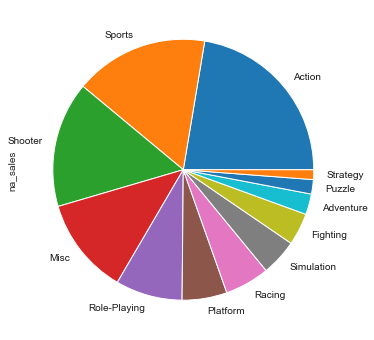

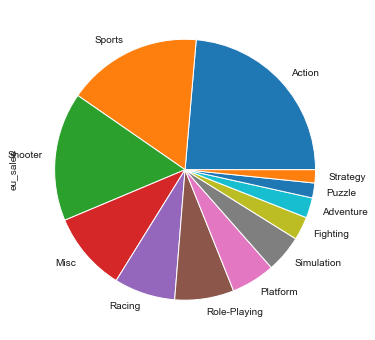

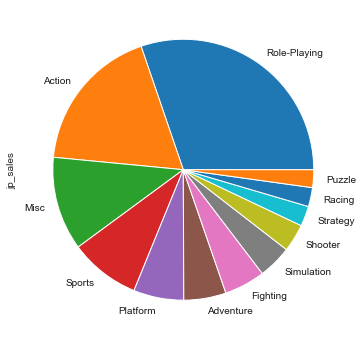

In [89]:
plt.figure(figsize=(6,6))
df9['na_sales'].sort_values(ascending = False).plot(kind='pie')
plt.figure(figsize=(6,6))
df9['eu_sales'].sort_values(ascending = False).plot(kind='pie')
plt.figure(figsize=(6,6))
df9['jp_sales'].sort_values(ascending = False).plot(kind='pie')

Вывод: 
- в регионах NA и EU в топ 5 входят почти одни и те же жанры: Action, Sports, Shooter, Misk и Role-Playing / Racing.  
- в регионе JP существенное отличие: на 1 месте с больщим отрывом - Role-Playing; на последнем - Platform,  на 2-4 местах Action, Misc, Sports(cхожесть с NA UE) 

## 4.3 Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Создадим сводную таблицу объема продаж для рейтинга ESRB с разбивкой по регионам:

In [90]:
df10 = df5.groupby('rating').sum()[['na_sales','eu_sales','jp_sales']]
df10

,na_sales,eu_sales,jp_sales
rating,,,
E,802.15,461.62,120.46
E10+,323.09,178.47,36.57
EC,1.32,0.00,0.00
M,577.64,401.91,44.45
RP,0.00,0.08,0.00
T,433.00,239.19,84.07


Сделаем сортировку таблицы для каждого региона:

In [91]:
print(df10['na_sales'].sort_values(ascending = False))
print()
print(df10['eu_sales'].sort_values(ascending = False))
print()
print(df10['jp_sales'].sort_values(ascending = False))

rating
E       802.15
M       577.64
T       433.00
E10+    323.09
EC        1.32
RP        0.00
Name: na_sales, dtype: float64

rating
E       461.62
M       401.91
T       239.19
E10+    178.47
RP        0.08
EC        0.00
Name: eu_sales, dtype: float64

rating
E       120.46
T        84.07
M        44.45
E10+     36.57
RP        0.00
EC        0.00
Name: jp_sales, dtype: float64


Также покажем результат на круговой диаграмме:

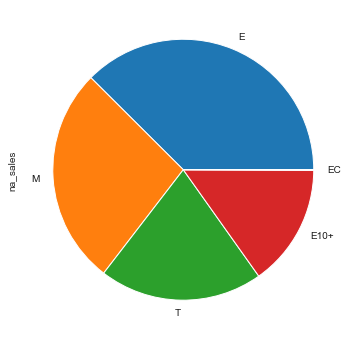

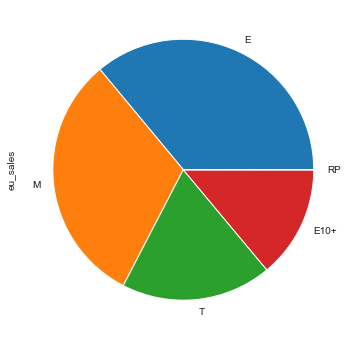

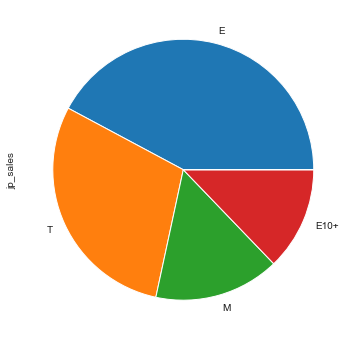

In [92]:
plt.figure(figsize=(6,6))
df10['na_sales'].sort_values(ascending = False).plot(kind='pie')
plt.figure(figsize=(6,6))
df10['eu_sales'].sort_values(ascending = False).plot(kind='pie')
plt.figure(figsize=(6,6))
df10['jp_sales'].sort_values(ascending = False).plot(kind='pie')

Вывод: Рейтинг ESRB влияет на продажи. Во всех регионах с хорошим отрывом лидирует рейтинг "E". На 2-3 местах "T" и "M".  
# 5. А/B тест
## Будем проверять следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.  
## 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:  
Нулевая гипотеза (H0) - рейтинги платформ Xbox One и PC одинаковые;  
Альтернативная гипотеза (H1) - рейтинги платформ Xbox One и PC НЕ одинаковые;  
Сформируем выборки для анализа:

In [96]:
xboxone_user_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
xboxone_user_scores 

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 186, dtype: float64

In [97]:
ps_user_scores = df[df['platform'] == 'PS']['user_score'].dropna()
ps_user_scores

52       8.700000
65       9.200000
67       9.000000
88       8.600000
106      9.100000
           ...   
15588    8.800000
15594    8.400000
15820    8.800000
15852    6.684856
15875    7.200000
Name: user_score, Length: 206, dtype: float64

Посмотрим на средние значения:

In [98]:
print(xboxone_user_scores.mean())
print(ps_user_scores.mean())

6.523970347056788
7.616490810381319


Посмотрим на дисперсии:

In [99]:
print(xboxone_user_scores.var())
print(ps_user_scores.var())

1.8733107898180539
1.768979923147575


В качестве критерия оценки гипотез используем величину "p-value" - вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна.

In [100]:
results = sp.stats.ttest_ind(xboxone_user_scores, ps_user_scores, equal_var = False)
print('p-значение = ',results.pvalue)

p-значение =  1.5098767512487556e-14


Дополнительная проверка:  
https://www.evanmiller.org/ab-testing/t-test.html#!6.52397/1.368689/186;7.616491/1.33003/206@95

Вывод:  
p-value равно = 1.5^-14 (практически равно нулю). Общепринятые пороговые значения составляют 1% и 5%. При таком маленьком значении p-value стоит отбросить нулевую гипотезу H0 и согласиться с гипотезой H1. Следовательно принимаем, что  рейтинги платформ Xbox One и PC __РАЗЛИЧАЮТСЯ__  
## 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные:  
Нулевая гипотеза (H0) - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») __ОДИНАКОВЫЕ__;  
Альтернативная гипотеза (H1) - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») __РАЗНЫЕ__.  
Сформируем выборки для анализа:

In [93]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [94]:
action_user_scores = df.query('genre == "Action"')['user_score'].dropna()
action_user_scores

16       8.200000
17       9.000000
23       8.100000
24       8.700000
38       8.500000
           ...   
16654    5.100000
16660    6.700000
16663    2.400000
16692    7.600000
16695    6.986422
Name: user_score, Length: 2043, dtype: float64

In [95]:
sports_user_scores = df.query('genre == "Sports"')['user_score'].dropna()
sports_user_scores

0        8.000000
3        8.000000
13       7.700000
15       7.400000
77       4.300000
           ...   
16518    1.400000
16528    6.900000
16546    9.500000
16551    8.252997
16643    6.600000
Name: user_score, Length: 1324, dtype: float64

Посмотрим на средние значения:

In [96]:
print(action_user_scores.mean())
print(sports_user_scores.mean())

6.9872413357252015
6.922404516897882


Посмотрим на дисперсии:

In [97]:
print(action_user_scores.var())
print(sports_user_scores.var())

1.8896625994209912
2.269159683486119


В качестве критерия оценки гипотез используем величину "p-value" - вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна.

In [98]:
results2 = sp.stats.ttest_ind(action_user_scores, sports_user_scores,  equal_var = False)
print('p-значение = ',results2.pvalue)

p-значение =  0.206999557508972


Дополнительная проверка:
https://www.evanmiller.org/ab-testing/t-test.html#!6.987241/1.37465/2043;6.922405/1.506373/1324@95  
Вывод:  
p-value равно = 20.7%. Общепринятые пороговые значения составляют 1% и 5%. Мы существенно превысили их. Следовательно есть веские основания принять нулевую гипотезу H0:
<<Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») __ОДИНАКОВЫЕ__>>

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8600 non-null   float64
 9   user_score       8710 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 2.2+ MB


# 6. Общие выводы  
1. В исходном датасете представлена не вся информация, у некоторых данных не верный тип переменной. Была проведена предобработка, в ходе которой часть пропусков заполнени по выявленным в исходном датесете закономерностям и установили нужные типы данных. 
2. По суммарным продажам с большим отрывом лидирует регион NA. Далее регионы расположились в следующем порядке: 2 место - EU; 3 место - JP; 4 место - остальные.  
3.  До 1994г выпущено мало игр (в среднем 27.3 игры/год). Начиная с 1994г произошло значительное увеличение числа вышедших игр (с среднем 710 игр/год).
4. Для всех платформ можно выделить общий средний актуальный период - время с момента выхода платформы до момента прекращения выхода игр для платформы (платформа себя изжила). Данный период составил 11 лет.
5. На момент 2016 года можно выделить 3 потенциально перспективных платформы - "PS4", "XOne", "WiiU".  
6. Среди платформ прослеживается сильное различие в суммарных продажах (есть очень прибыльные и совсем не прибыльные).  При этом средние  (медианные) значения продаж от каждой игры  у всех платформ отличаются не значительно (по сравнению с общими продажами).  
7. Составлены портреты пользователя каждого региона:  
NA: топ платформы -  X360, Wii, PS3; топ жанры - Action, Sports, Shooter;
EU: топ платформы -  X360, PS3, Wii; топ жанры - Action, Sports, Shooter;
EU: топ платформы -  DC, 3DS, PS3; топ жанры - Role-playing, Action, Misk;
8. Рейтинг ESRB влияет на продажи. Во всех регионах с хорошим отрывом лидирует рейтинг "E". На 2-3 местах "T" и "M".
9. Проведена проверка гипотез методом "t-тест", которая показала:
- есть высокая вероятность, что Средние пользовательские рейтинги платформ Xbox One и PC различаются.
- есть высокая вероятность, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.